## 선형 회귀
- 입력 특성에 대한 선형함수를 만들어 예측하는 알고리즘
- 주로 사용되는 성능평가지표는 MSE(평균 제곱 오차)
- 통계적 방식의 회귀분석은 정규방정식을 사용해 문제를 해결하지만
- 머신러닝 모델은 경사하강법을 이용해 문제를 해결

#### 분석방법
- scikit-learn의 LinearRegression은 최소 자승법을 사용한 OLS 방식으로 선형 회귀모델을 구현
- LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=True, positive=True)
- fit_intercept는 모델에 대한 절편 계산 여부, False로 둘 경우 데이터가 원점을 지나는 것으로 예상
- normalizer=True는 L2-norm으로 나누어 정규화, False일 경우는 정규화 하지 않는다.
- copy_X는 데이터 덮어쓰기 여부, n_jobs는 계산 작업 횟수, positive=True로 하면 계수가 양수가 된다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


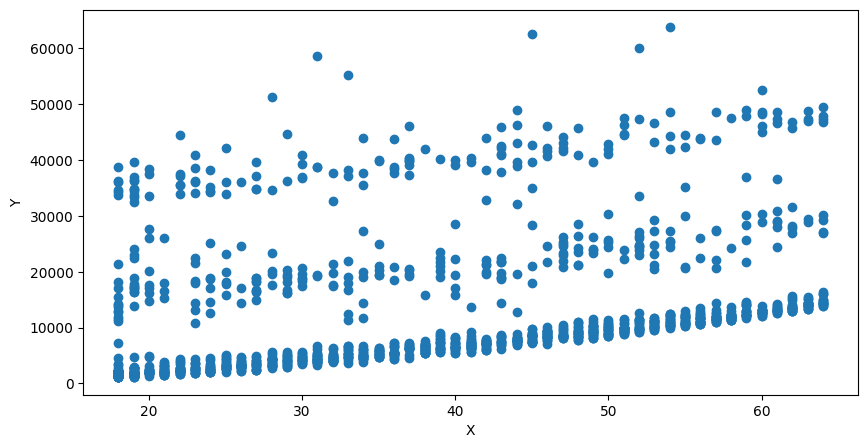

In [4]:
## 데이터의 선형성 확인
x = data['age']
y = data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [6]:
print('선형 회귀 모델 결과')
print(f'절편 : {lr.intercept_}, 계수 : {lr.coef_}')

선형 회귀 모델 결과
절편 : [3165.88500606], 계수 : [[257.72261867]]


In [7]:
print(lr.score(x, y))

0.08940589967885804


In [9]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


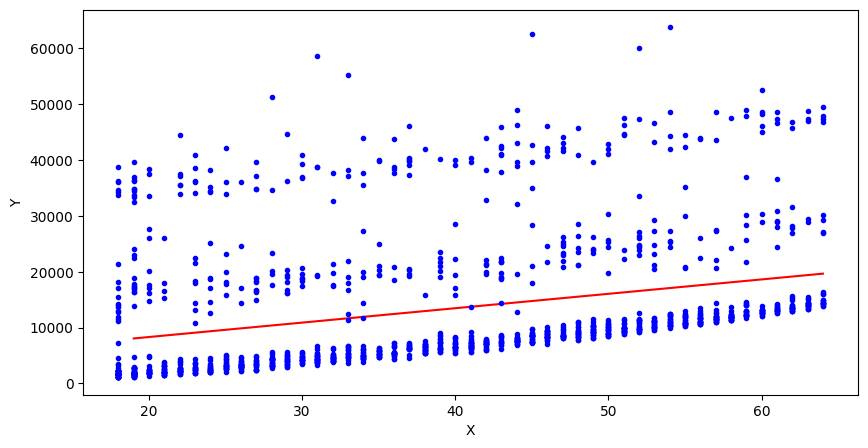

In [10]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 경사하강법
- 함수의 값이 낮아지는 방향으로 독립변수의 값을 바꿔가면서 최종적으로 최소 함수값을 갖도록 하는 독립 변수값을 찾는 방식
- 머신러닝에서 파라미터를 반복적으로 조정해서 최적의 해법을 찾는데 사용한다
- 머신러닝에서 최솟값을 찾는 방식으로 경사하강법을 사용하는 이유는 2가지
1. 분석에서의 함수들은 형태가 복잡해 미분계수와 해를 찾기 어려울 수 있다
2. 데이터의 양이 큰 경우 경사하강법이 상대적으로 쉽게 컴퓨터로 구현 가능하다
- 무작위초기화로 임의의값으로 시작해서 조금씩 함수 값이 감소하는 방향으로 최솟값이 수렴할때까지 점진적으로 진행한다
- 이떄 학습 스텝 크기를 학습률이라한다

#### 경사하강법 종류
1. 배치 경사하강법
- 반복 시 전체 훈련세트를 사용해 가중치 갱신
- 특징 : 계산량이 많아 훈련 시간 증가, 하지만 노이즈가 적은 최적의 값을 찾을 수 있다

2. 확률적 경사하강법
- 한 개의 샘플 데이터를 무작위로 선택하고 샘플에 대한 경사를 계산
- 매 반복마다 가중치가 달라져 최솟값으로 비용함수가 접근할 때 요동치며 감소한다
- 특징 : 최솟값에 요동치며 접근하기 때문에 알고리즘이 멈출 때 최적치가 아닐 수 있다.
- 하지만 지역 최솟값을 건너뛰고 전역 최솟값으로의 수렴 가능성이 높고 데이터 양이 많아도 속도가 빠르다

3. 미니 배치 경사하강법
- 각 스텝 반복 시 임의의 30~50개 관측값으로 경사를 계산하고 가중치 갱신
- 확률적 경사하강법보다 지역 최솟값에서 빠져나오기 어려울 가능성 존재
- 하지만 확률적 경사하강법보다 낮은 오차율로 최솟값에 더 가까이 도달할 수 있다

#### 모델사용
- scikit-learn의 SGDRegressor로 경사하강법을 활용한 선형 회귀 모델 학습 가능하다

In [21]:
from sklearn.linear_model import SGDRegressor

x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

sgd_reg = SGDRegressor(max_iter=1000, random_state=45)
sgd_reg.fit(x, y.ravel())

SGDRegressor(random_state=45)

In [22]:
print("SGD 모델 결과")
print(f'절편 : {sgd_reg.intercept_}, 계수 : {sgd_reg.coef_}')

SGD 모델 결과
절편 : [8032.65192852], 계수 : [55.01380517]


In [23]:
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[ 9077.91422666 11553.53545911]


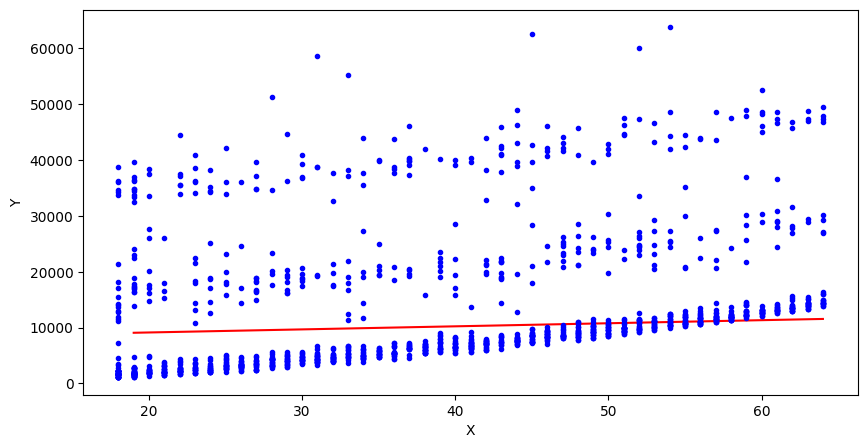

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()